In [10]:
# Clustering and Dimentionnality Reduction

<div class="alert alert-block alert-danger">

1. Import the CIFAR-10 dataset using the following code and create a new dataset containing only the following classes: "airplane," "automobile," "bird," and "cat."

<div/>

<div class="alert alert-block alert-warning">The CIFAR-10 dataset is composed of 60000 RGB images( 32x32 pixels), categorized into 10 classes with 6000 images per class. It is divided into 50000 training images and 10000 test images.
<div/>

In [6]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np
from sklearn.decomposition import PCA
# load dataset
(trainX, trainy), _ = cifar10.load_data()
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)


In [7]:
def display_samples(images, labels, label_names, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(label_names[labels[i][0]])
        plt.axis('off')
    plt.show()

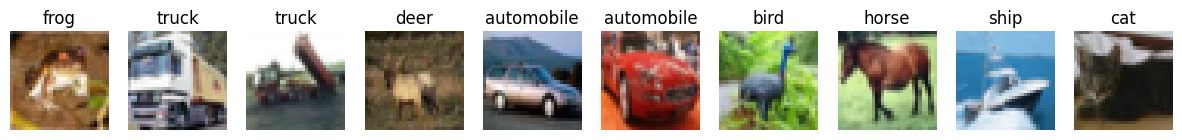

In [8]:
display_samples(trainX, trainy, label_names)

In [9]:
# Normalize the dataset
trainX_scaled = trainX.astype('float32') / 255.0


In [10]:
trainX_flattened = trainX_scaled.reshape((trainX_scaled.shape[0], -1))

In [11]:
pca = PCA(n_components=2)
trainX_pca = pca.fit_transform(trainX_flattened)
trainX_pca

array([[ -6.401125  ,   2.72913   ],
       [  0.82971376,  -0.9498969 ],
       [  7.7301235 , -11.521973  ],
       ...,
       [  0.7072719 , -11.34239   ],
       [ 11.36784   ,  -3.3758497 ],
       [  4.192727  ,  -1.1840589 ]], dtype=float32)

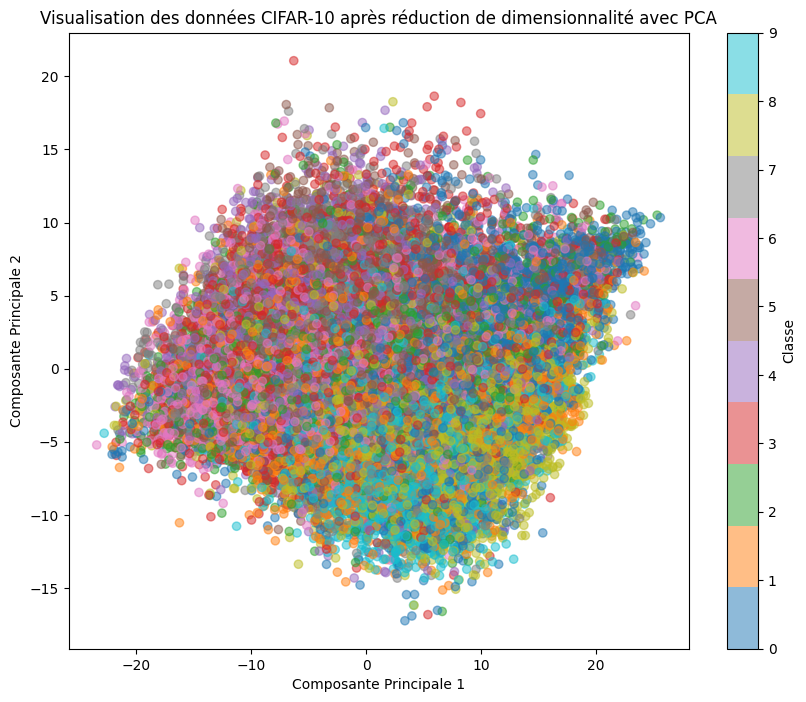

In [12]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(trainX_pca[:, 0], trainX_pca[:, 1], c=trainy.flatten(), cmap='tab10', alpha=0.5)
plt.title("Visualisation des données CIFAR-10 après réduction de dimensionnalité avec PCA")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.colorbar(scatter, label="Classe")
plt.show()

In [13]:
from sklearn.cluster import KMeans

kmeans_pca  = KMeans(n_clusters=10, random_state=0)   #n_clusters = K

kmeans_pca_labels = kmeans_pca.fit_predict(trainX_pca)

In [14]:
from sklearn.metrics import davies_bouldin_score
db_score_kmeans_pca = davies_bouldin_score(trainX_pca, kmeans_pca_labels)
print("Davies-Bouldin Score (K-means with PCA):", db_score_kmeans_pca)

Davies-Bouldin Score (K-means with PCA): 0.8537446510369033


In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3)
X_train_lda = lda.fit_transform(trainX_flattened,trainy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
from sklearn.cluster import KMeans

kmeans_lda = KMeans(n_clusters=10, random_state=42)
kmeans_lda_labels = kmeans_lda.fit_predict(X_train_lda)

In [17]:
from sklearn.metrics import davies_bouldin_score
db_score_kmeans_lda = davies_bouldin_score(X_train_lda, kmeans_lda_labels)
print("Davies-Bouldin Score (K-means with LDA):", db_score_kmeans_lda)

Davies-Bouldin Score (K-means with LDA): 1.1346872928898784


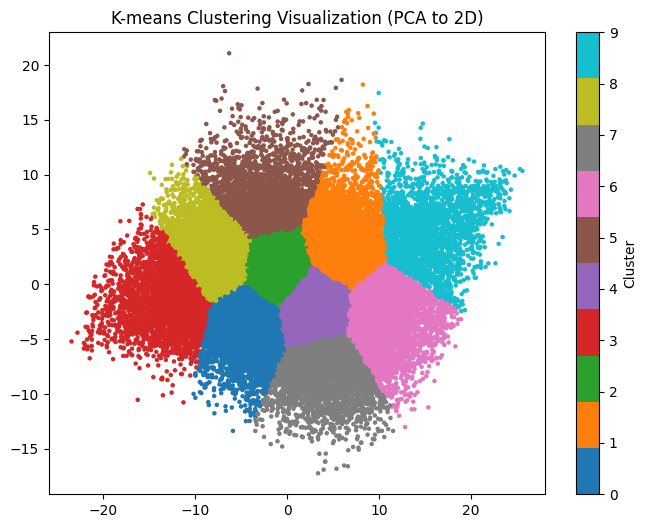

In [18]:
# Visualize K-means clustering with PCA (2D)
plt.figure(figsize=(8, 6))
plt.scatter(trainX_pca[:, 0], trainX_pca[:, 1], c=kmeans_pca_labels, cmap='tab10', s=5)
plt.colorbar(ticks=range(10), label="Cluster")
plt.title("K-means Clustering Visualization (PCA to 2D)")
plt.show()


In [19]:
# Map predicted clusters to actual labels
from scipy.stats import mode

def map_clusters_to_labels(clusters, true_labels):
    mapping = {}
    for cluster in np.unique(clusters):
        mask = clusters == cluster
        # Use bincount to find the most frequent label
        label = np.bincount(true_labels[mask]).argmax()
        mapping[cluster] = label
    return np.array([mapping[cluster] for cluster in clusters])

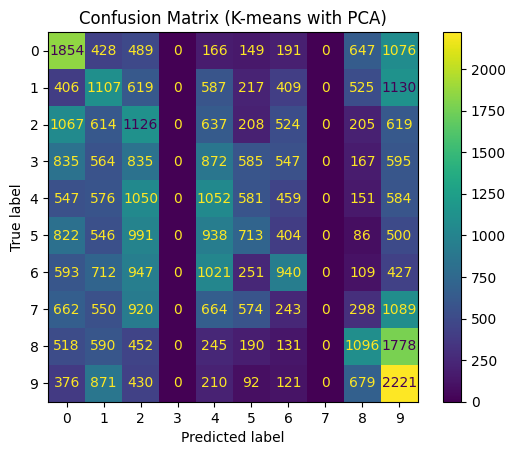

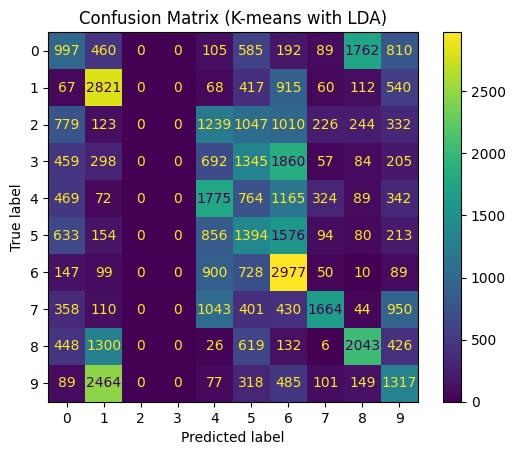

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mapped_labels_pca = map_clusters_to_labels(kmeans_pca_labels, trainy.ravel())
mapped_labels_lda = map_clusters_to_labels(kmeans_lda_labels, trainy.ravel())

ConfusionMatrixDisplay.from_predictions(trainy.ravel(), mapped_labels_pca)
plt.title("Confusion Matrix (K-means with PCA)")
plt.show()

ConfusionMatrixDisplay.from_predictions(trainy.ravel(), mapped_labels_lda)
plt.title("Confusion Matrix (K-means with LDA)")
plt.show()


In [56]:
from sklearn.metrics import classification_report
plt.title("Classification Report (K-means with PCA)")
print(classification_report(trainy.ravel(), kmeans_pca_labels, target_names=label_names))

K-means Classification Report:
              precision    recall  f1-score   support

    airplane       0.07      0.09      0.07      5000
  automobile       0.04      0.04      0.04      5000
        bird       0.14      0.23      0.18      5000
         cat       0.14      0.11      0.12      5000
        deer       0.07      0.09      0.08      5000
         dog       0.20      0.14      0.17      5000
        frog       0.03      0.02      0.02      5000
       horse       0.09      0.07      0.08      5000
        ship       0.04      0.05      0.04      5000
       truck       0.05      0.03      0.04      5000

    accuracy                           0.09     50000
   macro avg       0.09      0.09      0.08     50000
weighted avg       0.09      0.09      0.08     50000



In [57]:
from sklearn.metrics import classification_report
plt.title("Classification Report (K-means with LDA)")
print(classification_report(trainy.ravel(), kmeans_lda_labels, target_names=label_names))

K-means Classification Report:
              precision    recall  f1-score   support

    airplane       0.08      0.12      0.09      5000
  automobile       0.14      0.16      0.15      5000
        bird       0.06      0.07      0.06      5000
         cat       0.19      0.20      0.20      5000
        deer       0.26      0.35      0.30      5000
         dog       0.00      0.00      0.00      5000
        frog       0.03      0.03      0.03      5000
       horse       0.02      0.01      0.01      5000
        ship       0.44      0.41      0.42      5000
       truck       0.04      0.02      0.03      5000

    accuracy                           0.14     50000
   macro avg       0.13      0.14      0.13     50000
weighted avg       0.13      0.14      0.13     50000

